## Importamos las funciones que necesitaremos para el análisis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importamos el csv para el análisis

In [20]:
market = pd.read_csv("output/clean_csv.csv")

In [21]:
market.head(10)

,distrito,numero_distrito,barrio,numero_barrio,tipo,nueva_construccion,metros2_const,n_habitaciones,n_banos,jardin,piscina,parking,precio_venta,eurosm2_distrito,eurosm2_barrio
0,Villaverde,District 21,San Cristóbal,Neighborhood 135,Pisos,False,64.0,2,1.0,False,False,False,85000,1328,1308.89
1,Villaverde,District 21,Los Ángeles,Neighborhood 132,Pisos,False,70.0,3,1.0,False,False,False,129900,1856,1796.68
2,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,94.0,2,2.0,False,False,False,144247,1535,1617.18
3,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,64.0,2,1.0,False,False,False,109900,1717,1617.18
4,Villaverde,District 21,Los Rosales,Neighborhood 133,Pisos,False,108.0,2,2.0,False,True,True,260000,2407,1827.79
5,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,126.0,4,2.0,False,False,True,195000,1548,1617.18
6,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,120.0,5,2.0,False,True,True,190000,1583,1617.18
7,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,125.0,3,2.0,False,False,False,198500,1588,1617.18
8,Villaverde,District 21,Butarque,Neighborhood 131,Pisos,False,84.0,3,2.0,False,True,True,212000,2524,2197.8
9,Villaverde,District 21,Los Rosales,Neighborhood 133,Pisos,False,85.0,2,1.0,False,False,False,131400,1546,1827.79


# Tenemos un cliente interesado en invertir en el mercado inmobiliario de lujo mediante la compra de activos ya existentes y tenemos que convencerle de que Madrid es la mejor ciudad para sus inversiones. Para ello, contamos con los datos de los inmuebles en venta de esta ciudad.

##### 1. Analizaremos las zonas donde exista mayor volumen de activos de lujo en venta

In [106]:
target = market[(market.metros2_const > 200) & (market.jardin == True) & (market.piscina == True) & (market.parking == True)].reset_index()

In [107]:
target.shape

(888, 16)

In [108]:
target.iloc[0:20]

,index,distrito,numero_distrito,barrio,numero_barrio,tipo,nueva_construccion,metros2_const,n_habitaciones,n_banos,jardin,piscina,parking,precio_venta,eurosm2_distrito,eurosm2_barrio
0,810,Vicálvaro,District 19,El Cañaveral - Los Berrocales,Neighborhood 126,Casa o chalet,True,248.0,4,3.0,True,True,True,348000,1403,2271.52
1,811,Vicálvaro,District 19,El Cañaveral - Los Berrocales,Neighborhood 126,Casa o chalet,True,205.0,3,3.0,True,True,True,350000,1707,2271.52
2,1022,Vicálvaro,District 19,El Cañaveral - Los Berrocales,Neighborhood 126,Casa o chalet,True,248.0,4,3.0,True,True,True,348000,1403,2271.52
3,1026,Vicálvaro,District 19,El Cañaveral - Los Berrocales,Neighborhood 126,Casa o chalet,False,306.0,4,3.0,True,True,True,417000,1363,2271.52
4,1031,Vicálvaro,District 19,El Cañaveral - Los Berrocales,Neighborhood 126,Casa o chalet,True,248.0,4,3.0,True,True,True,354100,1428,2271.52
5,1032,Vicálvaro,District 19,El Cañaveral - Los Berrocales,Neighborhood 126,Casa o chalet,True,248.0,4,3.0,True,True,True,353000,1423,2271.52
6,1033,Vicálvaro,District 19,El Cañaveral - Los Berrocales,Neighborhood 126,Casa o chalet,True,248.0,4,3.0,True,True,True,354000,1427,2271.52
7,1228,Villa de Vallecas,District 20,Ensanche de Vallecas - La Gavia,Neighborhood 129,Casa o chalet,True,297.0,3,3.0,True,True,True,675000,2273,2677.28
8,1316,Villa de Vallecas,District 20,Ensanche de Vallecas - La Gavia,Neighborhood 129,Casa o chalet,True,269.0,3,3.0,True,True,True,470000,1747,2677.28
9,1317,Villa de Vallecas,District 20,Ensanche de Vallecas - La Gavia,Neighborhood 129,Casa o chalet,True,270.0,3,3.0,True,True,True,470000,1741,2677.28


In [109]:
dis_zonal = target.groupby("distrito")["distrito"].count().sort_values(ascending = False)
dis_zonal

distrito
Moncloa              324
Hortaleza            297
Fuencarral           166
Chamartín             72
Villa de Vallecas     10
Vicálvaro              7
Ciudad Lineal          4
Chamberí               4
Barajas                2
Salamanca              1
Carabanchel            1
Name: distrito, dtype: int64

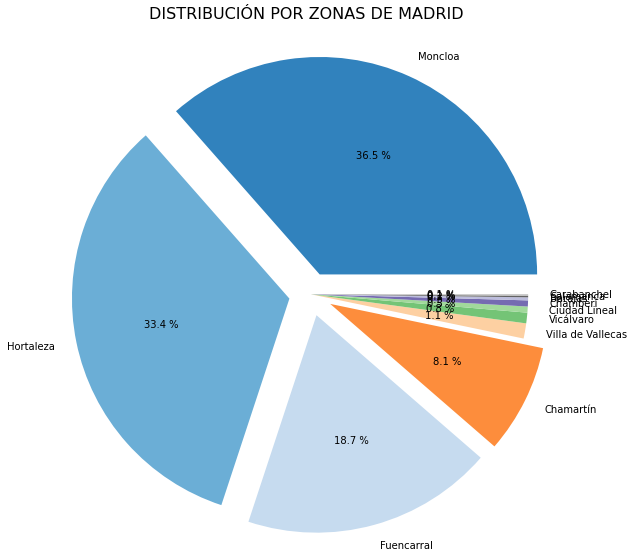

In [110]:
labels = ['Moncloa', 'Hortaleza', 'Fuencarral', 'Chamartín', 'Villa de Vallecas', 'Vicálvaro', 'Ciudad Lineal', 'Chamberí', 'Barajas', 'Salamanca', 'Carabanchel']
explode = [0.2,0.2,0.2,0.2,0,0,0,0,0,0,0]
fig = plt.figure(figsize = (5,5))
theme = plt.get_cmap('tab20c')
plt.pie(dis_zonal, labels = labels, autopct = "%0.1f %%", radius = 2, explode = explode, colors = [theme(1. * i / len(labels)) for i in range(len(labels))])
plt.suptitle("DISTRIBUCIÓN POR ZONAS DE MADRID", y = 1.3, fontsize = 16)
plt.show()

In [128]:
precio_medio_distrito = target.groupby("distrito")["precio_venta"].mean().sort_values(ascending = False)
precio_medio_distrito

distrito
Chamartín            3.572444e+06
Chamberí             2.685000e+06
Hortaleza            2.022108e+06
Moncloa              1.811757e+06
Fuencarral           1.574647e+06
Salamanca            1.495000e+06
Ciudad Lineal        1.020000e+06
Barajas              7.925000e+05
Carabanchel          5.970000e+05
Villa de Vallecas    5.437000e+05
Vicálvaro            3.605857e+05
Name: precio_venta, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

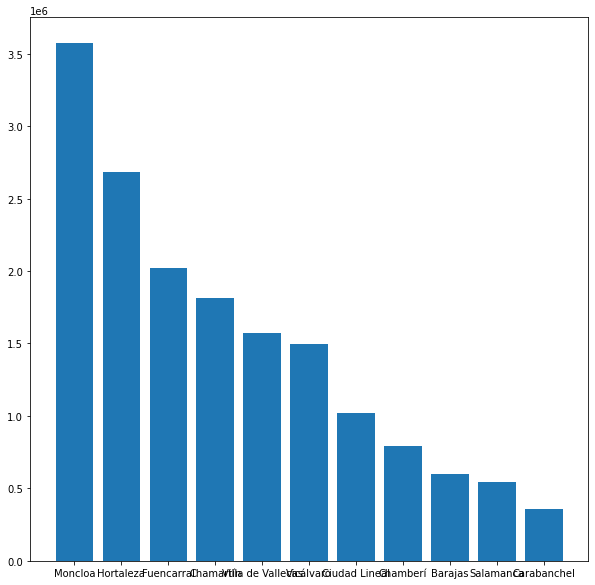

In [132]:
fig = plt.figure(figsize = (10,10))
x = ['Moncloa', 'Hortaleza', 'Fuencarral', 'Chamartín', 'Villa de Vallecas', 'Vicálvaro', 'Ciudad Lineal', 'Chamberí', 'Barajas', 'Salamanca', 'Carabanchel']
plt.bar(x, precio_medio_distrito)
plt.set_xticklabels(x, rotation=45)
plt.show()